In [13]:
import os
import requests
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import functional as F

import sys
sys.path.insert(1, r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\source")
from data_utils import *



# Define the path where you want to save the dataset
data_dir = "./coco_dataset"
os.makedirs(data_dir, exist_ok=True)

# URLs for COCO dataset annotations and images (adjust these paths accordingly)
annotations_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
images_train_url = "http://images.cocodataset.org/zips/train2017.zip"



In [2]:
# Download and unzip the annotations (captions)
print("Downloading annotations...")
annotations_file = os.path.join(data_dir, "annotations_trainval2017.zip")
if not os.path.exists(annotations_file):
    response = requests.get(annotations_url)
    with open(annotations_file, "wb") as f:
        f.write(response.content)
os.system(f"unzip {annotations_file} -d {data_dir}")

# Download and unzip the training images
print("Downloading training images (this may take a while)...")
images_train_file = os.path.join(data_dir, "train2017.zip")
if not os.path.exists(images_train_file):
    response = requests.get(images_train_url)
    with open(images_train_file, "wb") as f:
        f.write(response.content)
os.system(f"unzip {images_train_file} -d {data_dir}")

KeyboardInterrupt: 

In [14]:

# Initialize COCO dataset
data_type = "train2017"  # You can change this to "val2017" for the validation set
ann_file = os.path.join(data_dir, f"annotations/instances_{data_type}.json")
coco = COCO(ann_file)


loading annotations into memory...
Done (t=11.03s)
creating index...
index created!


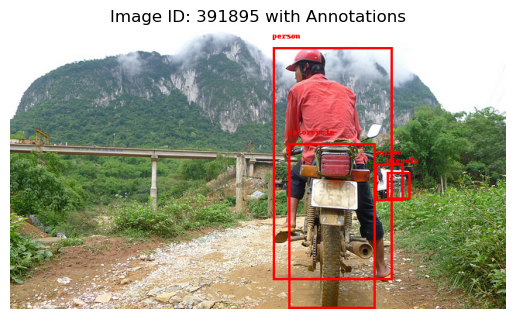

In [15]:

# Get the first image
img_ids = coco.getImgIds()
img = coco.loadImgs(img_ids[0])[0]

# Load and display the image
image_path = os.path.join(data_dir, data_type, img["file_name"])
image = Image.open(image_path)

# Create a drawing context
draw = ImageDraw.Draw(image)

# Get annotations for the image
ann_ids = coco.getAnnIds(imgIds=img["id"])
anns = coco.loadAnns(ann_ids)

# Draw bounding boxes and labels on the image
for ann in anns:
    bbox = ann["bbox"]
        # Convert COCO format (x, y, width, height) to PIL format (left, top, right, bottom)
    left, top, width, height = bbox
    right = left + width
    bottom = top + height
    
    category = coco.loadCats(ann["category_id"])[0]["name"]
    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline="red", width=3)
    draw.text((bbox[0], bbox[1] - 20), category, fill="red")

# Display the image with annotations
plt.imshow(image)
plt.axis("off")
plt.title(f"Image ID: {img['id']} with Annotations")
plt.show()


In [19]:
# Define your dataset path and annotation file
dataset_root = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\COCO_DS\coco_dataset\train2017"
annotation_file = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\COCO_DS\coco_dataset\annotations\instances_train2017.json"

# Define data transformations (adjust as needed)
data_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Create an instance of the custom dataset
dataset = CocoDataset(root_dir=dataset_root, annotation_file=annotation_file, transform=data_transform)

# Create a data loader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)

In [20]:
dataset[0]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.6431, 0.5137, 0.6745,  ..., 0.2157, 0.2157, 0.1569],
          [0.7882, 0.5569, 0.5882,  ..., 0.2824, 0.2863, 0.2588],
          [0.6902, 0.7882, 0.7373,  ..., 0.1843, 0.2157, 0.2353]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.5490, 0.3255, 0.5961,  ..., 0.2431, 0.2314, 0.1529],
          [0.6431, 0.4196, 0.4588,  ..., 0.3451, 0.3373, 0.3922],
          [0.6157, 0.7098, 0.6471,  ..., 0.2235, 0.2824, 0.3098]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [21]:
category

'bicycle'

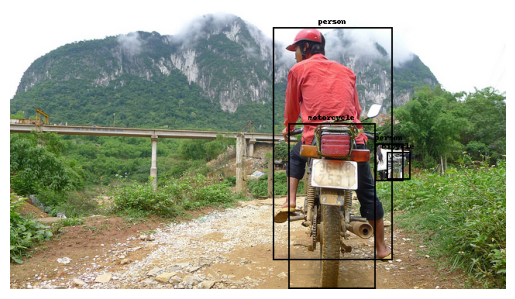

In [24]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import torch

# Get the annotations for the first image
image_id = 0   # Index of the first image in the dataset

# Get the RGB image tensor from your dataset
image_tensor = dataset[image_id][0]

# Ensure the image tensor is in the correct format (HWC: Height, Width, Channels)
image_tensor = image_tensor.permute(1, 2, 0)

# Convert the tensor to a NumPy array
rgb_image_array = image_tensor.cpu().numpy()

# Normalize the pixel values to [0, 255] and cast to uint8
rgb_image_array = (rgb_image_array * 255).astype(np.uint8)

# Create a PIL Image from the RGB array
image = Image.fromarray(rgb_image_array)

# Create a draw object to add bounding boxes and labels to the image
draw = ImageDraw.Draw(image)

# Get the annotations for the first image
annotations = dataset[image_id][1]

for i in range(len(annotations['boxes'])):
    category_id = annotations['labels'][i]
    bbox = annotations['boxes'][i]
    
    
    category_name = coco.loadCats(category_id.item())[0]["name"]

    # Convert COCO format (x, y, width, height) to PIL format (left, top, right, bottom)
    left, top, width, height = bbox
    right = left + width
    bottom = top + height

    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline='black', width=2)

    # Use textbbox instead of textsize
    text = f"{category_name}"
    text_bbox = draw.textbbox((0, 0), text)
    text_x = (left + right - text_bbox[2]) / 2
    text_y = top - text_bbox[3] - 2  # Adjust for spacing
    draw.text((text_x, text_y), text, fill='black')


# Display the image with bounding boxes and labels
plt.imshow(image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

image.save('output.png')

#To display on a new windows bigger
image.show()